In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import (read_and_average_virtual_exp, read_and_average_genomic_exp)

In [3]:
# stat metric the analysis is based on
stat_of_analysis_interest = "SCD"

### Insertion data

In [4]:
# reading data, averaging over targets and backgrounds
insertion_df = read_and_average_virtual_exp("/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_singletons", stat_to_average=stat_of_analysis_interest)

reading h5 files to dataframes
averaging over targets
averaging over backgrounds
collecting data for SCD


### Disruption data

In [5]:
# reading data, averaging over targets
disruption_df = read_and_average_genomic_exp("/project/fudenber_735/akitaX1_analyses_data/genomic_disruption/disruption_by_permutation", stat_to_average=stat_of_analysis_interest)

reading h5 files to dataframes
averaging over targets
collecting data for SCD


## Correlation between insertion and disruption SCD

Text(0, 0.5, 'ave SCD disruption')

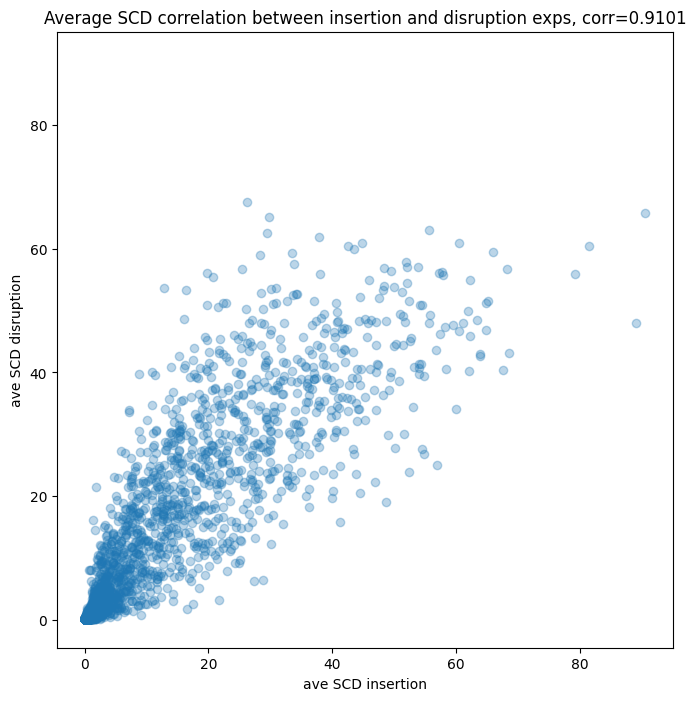

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(x=disruption_df[stat_of_analysis_interest], y=insertion_df[stat_of_analysis_interest], alpha=0.3)
perm_corr = round(stats.pearsonr(disruption_df[stat_of_analysis_interest], insertion_df[stat_of_analysis_interest]).statistic, 4)
plt.title(f"Average {stat_of_analysis_interest} correlation between insertion and disruption exps, corr={perm_corr}")

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# # now plot both limits against eachother
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel(f"ave {stat_of_analysis_interest} insertion")
plt.ylabel(f"ave {stat_of_analysis_interest} disruption")

## Scores histograms

Text(0.5, 0, 'ave SCD disruption')

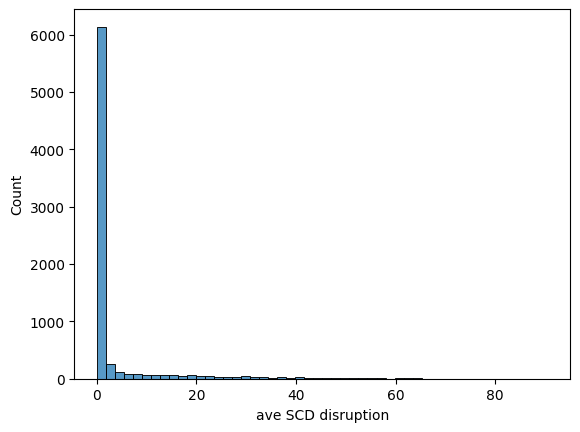

In [7]:
sns.histplot(x=disruption_df[stat_of_analysis_interest], bins=50)
plt.xlabel(f"ave {stat_of_analysis_interest} disruption")

Text(0.5, 0, 'ave SCD disruption')

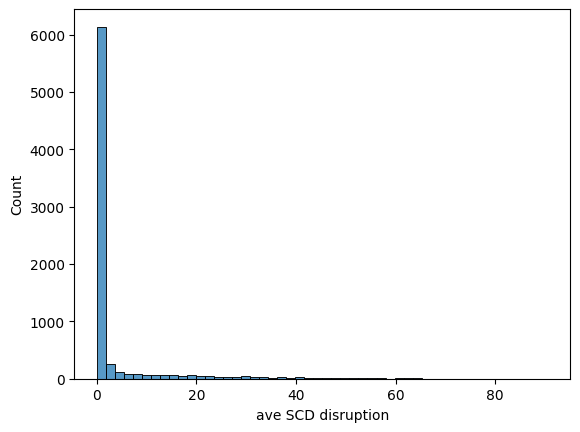

In [8]:
sns.histplot(x=disruption_df[stat_of_analysis_interest], bins=50)
plt.xlabel(f"ave {stat_of_analysis_interest} disruption")

## Histograms with log(count)

In [9]:
d_counts, d_bin_edges = np.histogram(disruption_df[stat_of_analysis_interest], bins=12)
d_log_counts = np.log10(d_counts)

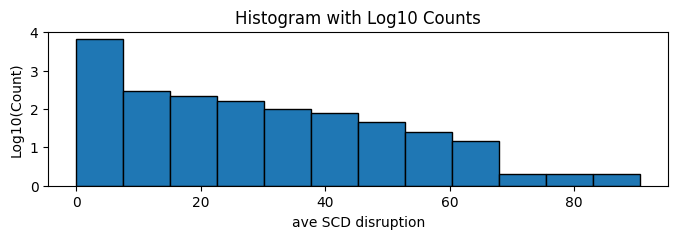

In [10]:
fig, ax = plt.subplots(figsize=(8, 2))

plt.bar(d_bin_edges[:-1], d_log_counts, width=np.diff(d_bin_edges), edgecolor="black", align="edge")

ax.set_xlim(lims)

# # Add labels and title
plt.xlabel(f"ave {stat_of_analysis_interest} disruption")
plt.ylabel("Log10(Count)")
plt.title("Histogram with Log10 Counts")

# Show plot
plt.show()

In [11]:
i_counts, i_bin_edges = np.histogram(insertion_df[stat_of_analysis_interest], bins=12)
i_log_counts = np.log10(i_counts)

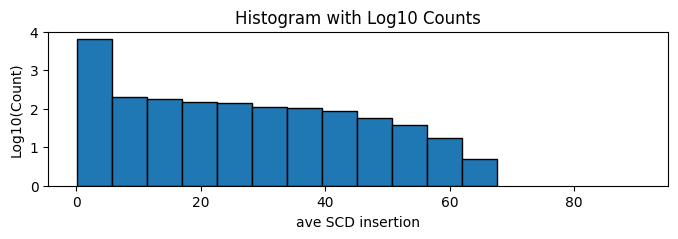

In [12]:
fig, ax = plt.subplots(figsize=(8, 2))

plt.bar(i_bin_edges[:-1], i_log_counts, width=np.diff(i_bin_edges), edgecolor="black", align="edge")

ax.set_xlim(lims)

# # Add labels and title
plt.xlabel(f"ave {stat_of_analysis_interest} insertion")
plt.ylabel("Log10(Count)")
plt.title("Histogram with Log10 Counts")

# Show plot
plt.show()